In [1]:
# Author：Sugulu
# Date：created 10月31日2017年
# のび太FX第1話　if文で予測　

In [2]:
# import関連
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # 実行上問題ない注意は非表示にします

%matplotlib inline

In [3]:
# dataフォルダの場所を、各自指定してください
data_dir = "./"

In [4]:
# FXデータの読み込み
data = pd.read_csv(data_dir + "USDJPY_1997_2017.csv")

In [5]:
# Close-Openをデータに追加します
data['Change'] = data.Close - data.Open
data.head() # データの概要を見てみます

,Date,Open,High,Low,Close,Change
0,1997/1/2,115.85,116.20,115.28,115.60,-0.25
1,1997/1/3,115.65,116.70,115.35,116.28,0.63
2,1997/1/6,116.75,116.98,115.38,115.75,-1.00
3,1997/1/7,115.74,116.02,114.80,115.25,-0.49
4,1997/1/8,115.22,116.00,114.90,115.73,0.51


In [6]:
# 2016年のデータを取り出します
data16 = data.iloc[4935:5193,:] # pythonは0番目からindexが始まります

# 2017年のデータを取り出します
data17 = data.iloc[5193:,:] 
data17.head()

,Date,Open,High,Low,Close,Change
5193,2017/1/2,116.882,117.661,116.882,117.316,0.434
5194,2017/1/3,117.314,118.606,117.226,117.698,0.384
5195,2017/1/4,117.696,118.188,117.061,117.273,-0.423
5196,2017/1/5,117.276,117.431,115.231,115.445,-1.831
5197,2017/1/6,115.445,117.177,115.075,116.996,1.551


In [7]:
# 2016年の合計を計算する
# 前々日終値に比べて前日終値が高い場合は、買い、低い場合は売りで入ります
sum_2016 = 0
for i in range(2,len(data16)): # len()で要素数を取得しています
    if data16.iloc[i-2,4] <= data16.iloc[i-1,4]:
        sum_2016 += data16.iloc[i,5]
    else:
        sum_2016 -= data16.iloc[i,5]

In [8]:
print("2016年の利益合計：%1.3lf" %sum_2016) # 2016年の利益合計

2016年の利益合計：9.675


In [9]:
# 2017年の合計を計算する
# 前々日終値に比べて前日終値が高い場合は、買い、低い場合は売りで入ります
sum_2017 = 0
for i in range(2,len(data17)): # len()で要素数を取得しています
    if data17.iloc[i-2,4] <= data17.iloc[i-1,4]:
        sum_2017 += data17.iloc[i,5]
    else:
        sum_2017 -= data17.iloc[i,5]

print("2017年の利益合計：%1.3lf" %sum_2017) # 2017年の利益合計

2017年の利益合計：-3.139


(95, 125)

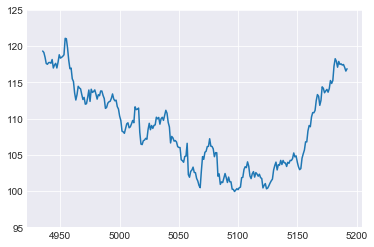

In [10]:
# 2016年のデータをプロットしてみます
plt.style.use('seaborn-darkgrid')
plt.plot(data16['Close'])
plt.ylim([95,125])

(95, 125)

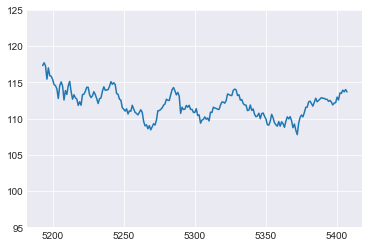

In [11]:
# 2017年からのデータをプロットしてみます
plt.plot(data17['Close'])
plt.ylim([95,125])